In [1]:
import numpy as np, os
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
l = np.array([309.92,328.80,323.74,339.88,232.62])/360.*2*np.pi
PI = np.array([0.282,0.381,0.364,0.439,0.610])
dpi = np.array([0.011,0.016,0.009,0.017,0.011])
d = 1./PI
derr = dpi/PI**2

In [3]:
with open('/Users/Lucas/Desktop/parallaxes.txt') as w:
    cats = np.array([s for s in w.readlines()])
    
masers = np.array([s[:90].split()[:10] for s in cats])
C = SkyCoord(masers[:,(1,2)],unit=(u.hourangle,u.degree))
D = 1./masers[:,3].astype(float)
Derr = masers[:,4].astype(float)/masers[:,3].astype(float)**2

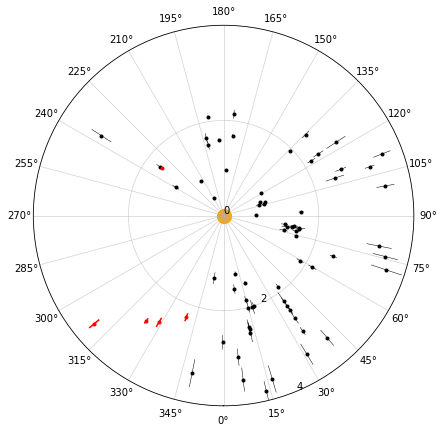

In [65]:
# Fixing random state for reproducibility
# Compute areas and colors

indx = np.ones(shape=D.shape).astype(bool)

indx = (Derr/D < 0.1)*(D+Derr < 4)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='polar')
ax.errorbar(C[indx].galactic.l.value*u.deg.to(u.rad),D[indx],
            marker='.',ls='',color='k',yerr=Derr[indx],lw=0.5)
ax.errorbar(l,d,marker='.',ls='',color='r',yerr=derr)
#ax.scatter(l, 1./PI, alpha=0.75,marker='s',color='r')
ax.set_yticks(np.arange(0,30.1,2))
ax.set_rlim(0,4)
ax.set_xticks(np.arange(0,360,15)/360.*2*np.pi)
ax.grid('True',alpha=0.5)
ax.set_theta_zero_location('S');
ax.scatter(0,0,color='orange',marker='o',s=200);


In [161]:
with open('/Users/Lucas/Methanol_multibeam_deg.txt') as w:
    mmb = np.array([s.split() for s in w.readlines()[4:] if len(s.split())==7])
    
c_mmb = SkyCoord(ra=mmb[:,1].astype(float)*u.deg,
                dec=mmb[:,2].astype(float)*u.deg)

/Users/Lucas/anaconda2/envs/analysis3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


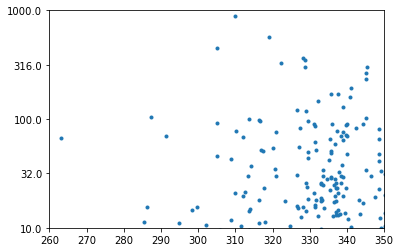

In [172]:
fig, ax = plt.subplots(1)
ax.plot(c_mmb.galactic.l.value,
        np.log10(mmb[:,6].astype(float)),'.')
ax.set_xlim(260,350)
ax.set_ylim(1,3)
ax.set_yticks([1,1.5,2,2.5,3]);
ax.set_yticklabels(np.round(10**np.array([1.,1.5,2,2.5,3]),0));

In [162]:
10**2

100